# Make Cards

In [1]:
import re

import pandas as pd
import numpy as np
from gedcom5.parser import GEDCOM5Parser
from gedcom5.tag import INDI

from common import year

In [2]:
parser = GEDCOM5Parser()

with open("data/royal92.ged") as f:
    gedcom = parser.parse_string(f.read())

## Births

In [3]:
def iterator():
    for indi in gedcom.indi:
        for birt in indi.birt:
            if birt.date is not None and birt.plac is not None:
                desc = f"{indi.name[0].value} is born in {birt.plac.value}"
                date_year = year(birt.date.value)

                if date_year is not None:
                    yield indi.xref_id, "BIRT", date_year, desc


df_birth = pd.DataFrame(
    data=iterator(),
    columns=["xref_id", "tag", "year", "desc"],
)
df_birth.year = df_birth.year.astype("Int64")
df_birth

,xref_id,tag,year,desc
0,@I1@,BIRT,1819,"Victoria /Hanover/ is born in Kensington,Pala..."
1,@I2@,BIRT,1819,Albert Augustus Charles// is born in Schloss R...
2,@I3@,BIRT,1840,Victoria Adelaide Mary// is born in Buckingham...
3,@I4@,BIRT,1841,"Edward_VII /Wettin/ is born in Buckingham,Pal..."
4,@I5@,BIRT,1843,"Alice Maud Mary// is born in Buckingham,Palace..."
...,...,...,...,...
476,@I2732@,BIRT,1911,"Erika /Patzek/ is born in ,Germany"
477,@I2736@,BIRT,1911,"Karin Emma Louise/Nissvandt/ is born in Nora,S..."
478,@I2885@,BIRT,1478,"Philip_I the_Handsome // is born in Bruges,Fla..."
479,@I2958@,BIRT,1990,Eugenie Victoria Helena/Windsor/ is born in Lo...


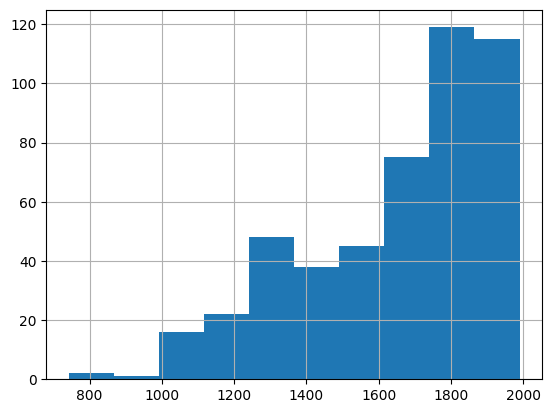

In [4]:
df_birth.year.hist();

## Deaths

In [5]:
def iterator():
    for indi in gedcom.indi:
        for deat in indi.deat:
            if deat.date is not None and deat.plac is not None:
                desc = f"{indi.name[0].value} dies in {deat.plac.value}"
                date_year = year(deat.date.value)

                if date_year is not None:
                    yield indi.xref_id, "DEAT", date_year, desc


df_death = pd.DataFrame(
    data=iterator(),
    columns=["xref_id", "tag", "year", "desc"],
)
df_death.year = df_death.year.astype("Int64")
df_death

,xref_id,tag,year,desc
0,@I1@,DEAT,1901,"Victoria /Hanover/ dies in Osborne House,Isle..."
1,@I2@,DEAT,1861,Albert Augustus Charles// dies in Windsor Cast...
2,@I3@,DEAT,1901,Victoria Adelaide Mary// dies in Friedrichshof...
3,@I4@,DEAT,1910,"Edward_VII /Wettin/ dies in Buckingham,Palace..."
4,@I5@,DEAT,1878,"Alice Maud Mary// dies in Darmstadt,,,Germany"
...,...,...,...,...
444,@I2523@,DEAT,1589,"Henry_III // dies in Paris,France"
445,@I2537@,DEAT,1461,"Charles_VII // dies in Bourges,France"
446,@I2543@,DEAT,1498,Charles_VIII // dies in Amboise
447,@I2564@,DEAT,877,Charles_II the_Bald // dies in Modano


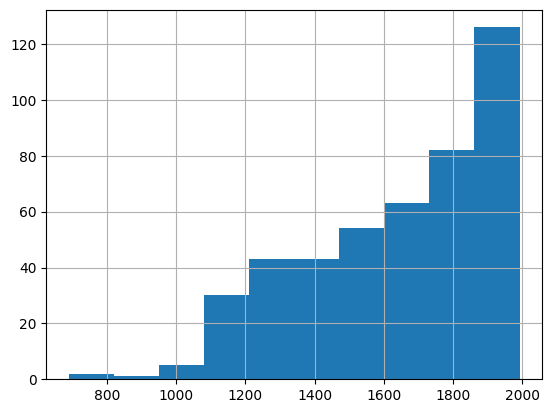

In [6]:
df_death.year.hist();

## Marriages

In [7]:
def iterator():
    for fam in gedcom.fam:
        if fam.husb is None or fam.wife is None:
            continue

        husb_indi = fam.husb.ref
        wife_indi = fam.wife.ref

        assert isinstance(husb_indi, INDI)
        assert isinstance(wife_indi, INDI)

        husb_name = husb_indi.name[0].value
        wife_name = wife_indi.name[0].value

        for marr in fam.marr:
            if marr.date is not None and marr.plac is not None:
                desc = f"{husb_name} and {wife_name} marry in {marr.plac.value}"
                date_year = year(marr.date.value)

                if date_year is not None:
                    yield fam.xref_id, "MARR", date_year, desc


df_marriage = pd.DataFrame(
    data=iterator(),
    columns=["xref_id", "tag", "year", "desc"],
)
df_marriage.year = df_marriage.year.astype("Int64")
df_marriage

,xref_id,tag,year,desc
0,@F1@,MARR,1840,Albert Augustus Charles// and Victoria /Hanov...
1,@F2@,MARR,1863,Edward_VII /Wettin/ and Alexandra of_Denmark ...
2,@F3@,MARR,1858,Frederick_III // and Victoria Adelaide Mary//...
3,@F4@,MARR,1894,Nicholas_II Alexandrovich /Romanov/ and Alexan...
4,@F5@,MARR,1882,Leopold George Duncan// and Helena Frederica o...
...,...,...,...,...
196,@F647@,MARR,1850,Frederick_VII // and Louise /Rasmussen/ marr...
197,@F662@,MARR,1836,Otto_I Friedrich Ludwig/Wittelsbach/ and Amali...
198,@F663@,MARR,1832,Leopold_I George of_Saxe-Coburg// and Louise M...
199,@F1295@,MARR,1932,Lennart Gustaf Nicholas// and Karin Emma Louis...


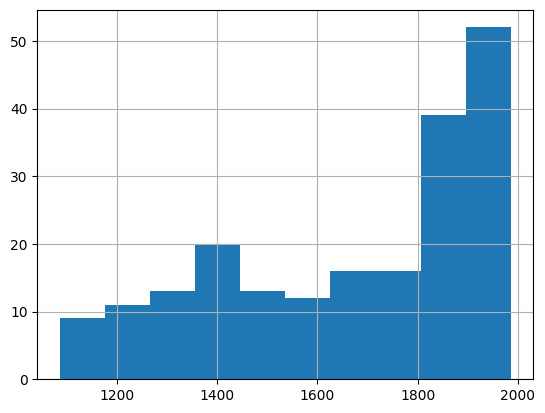

In [8]:
df_marriage.year.hist();

## Combined dataframe

In [9]:
df = pd.concat(
    [
        df_birth,
        df_death,
        df_marriage,
    ],
)
df

,xref_id,tag,year,desc
0,@I1@,BIRT,1819,"Victoria /Hanover/ is born in Kensington,Pala..."
1,@I2@,BIRT,1819,Albert Augustus Charles// is born in Schloss R...
2,@I3@,BIRT,1840,Victoria Adelaide Mary// is born in Buckingham...
3,@I4@,BIRT,1841,"Edward_VII /Wettin/ is born in Buckingham,Pal..."
4,@I5@,BIRT,1843,"Alice Maud Mary// is born in Buckingham,Palace..."
...,...,...,...,...
196,@F647@,MARR,1850,Frederick_VII // and Louise /Rasmussen/ marr...
197,@F662@,MARR,1836,Otto_I Friedrich Ludwig/Wittelsbach/ and Amali...
198,@F663@,MARR,1832,Leopold_I George of_Saxe-Coburg// and Louise M...
199,@F1295@,MARR,1932,Lennart Gustaf Nicholas// and Karin Emma Louis...


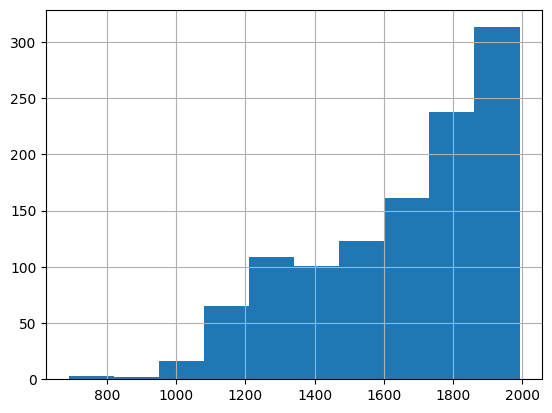

In [10]:
df.year.hist();

In [11]:
df.to_csv("data/cards.csv")